In [1]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print("Quantidade de amostras de treino: " + str(len(x_train)))
print("Quantidade de valores alvo de treino: " + str(len(y_train)))
print("Quantidade de amostras de teste: " + str(len(x_test)))
print("Quantidade de valores alvo de teste: " + str(len(y_test)))
print()
print("Dimensão dos dados de treino: " + str(x_train[0].shape))
print("Forma dos valores alvo de treino" + str(y_train.shape))
print()
print("Dimensão dos dados de teste: " + str(x_test[0].shape))
print("Forma dos valores alvo de teste" + str(y_test.shape))

Quantidade de amostras de treino: 60000
Quantidade de valores alvo de treino: 60000
Quantidade de amostras de teste: 10000
Quantidade de valores alvo de teste: 10000

Dimensão dos dados de treino: (28, 28)
Forma dos valores alvo de treino(60000,)

Dimensão dos dados de teste: (28, 28)
Forma dos valores alvo de teste(10000,)


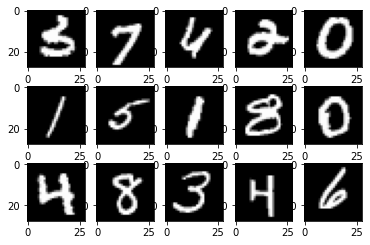

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#Mostrando 15 imagens aleatórioas do conjunto de dados de treino
#plt.figure(figsize=(20,10))
for i in range(15):

    plt.subplot(3,5,i+1)
    random_num = np.random.randint(0,len(x_test))
    plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [2]:
#Temos que adicionar uma quarta dimensão aos dados para
#Entrar no formato exigido pelo keras
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)
#Convertendo os valores oara float entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print("Forma dos dados de treino: " + str(x_train.shape))
print("Quantidade de amostras de treino: " + str(x_train.shape[0]))
print("Quantidade de amostras de teste: " + str(x_test.shape[0]))

Forma dos dados de treino: (60000, 28, 28, 1)
Quantidade de amostras de treino: 60000
Quantidade de amostras de teste: 10000


In [3]:
#Transformar os valores alvo em um vetor de tamanho igual as possibilidades que uma amostra pode assumir
#Nesse vetor somente o posição correspondente ao valor alvo de uma amostra possuirá valor 1, restante 0
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))
          
model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
batch_size = 16
epochs = 5

history = model.fit(x_train,
                   y_train,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test,y_test))

score = model.evaluate(x_test,y_test,verbose=1)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Epoch 1/5
3750/3750 [==============================] - 158s 42ms/step - loss: 0.2846 - accuracy: 0.9137 - val_loss: 0.1117 - val_accuracy: 0.9648
Epoch 2/5
3750/3750 [==============================] - 161s 43ms/step - loss: 0.1721 - accuracy: 0.9486 - val_loss: 0.0766 - val_accuracy: 0.9765
Epoch 3/5
3750/3750 [==============================] - 157s 42ms/step - loss: 0.1305 - accuracy: 0.9613 - val_loss: 0.0626 - val_accuracy: 0.9799
Epoch 4/5
3750/3750 [==============================] - 157s 42ms/step - loss: 0.1087 - accuracy: 0.9671 - val_loss: 0.0518 - val_accuracy: 0.9831
Epoch 5/5
313/313 [==============================] - 5s 16ms/step - loss: 0.0461 - accuracy: 0.9849
Test loss: 0.04606235399842262
Test accuracy: 0.9848999977111816


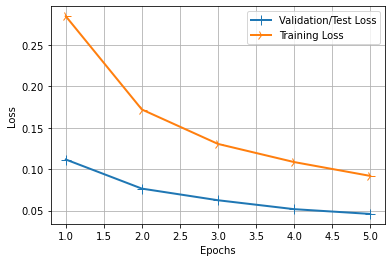

In [20]:
#Costruindo um gráfico que mostra as perdas de treino e test ao decorrer das epocas
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
#ver esses dados acima

line1 = plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2 = plt.plot(epochs,loss_values,label='Training Loss')
plt.setp(line1,linewidth=2.0,marker = '+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker = '4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

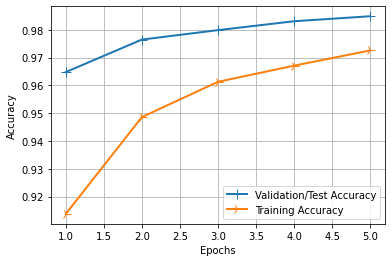

In [21]:
#Precisão de treino e test ao decorrer das epocas
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)
#ver esses dados acima

line1 = plt.plot(epochs,val_acc_values,label='Validation/Test Accuracy')
line2 = plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker = '+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker = '4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
model.save("C:/Users/gabri/Curso_Visao_Computacional/Reconhecimento de digitos/Modelos Salvos/" + str(score[1]) +".h5")

In [26]:
from keras.models import load_model

classifier = load_model("C:/Users/gabri/Curso_Visao_Computacional/Reconhecimento de digitos/Modelos Salvos/" + str(score[1]) +".h5")

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


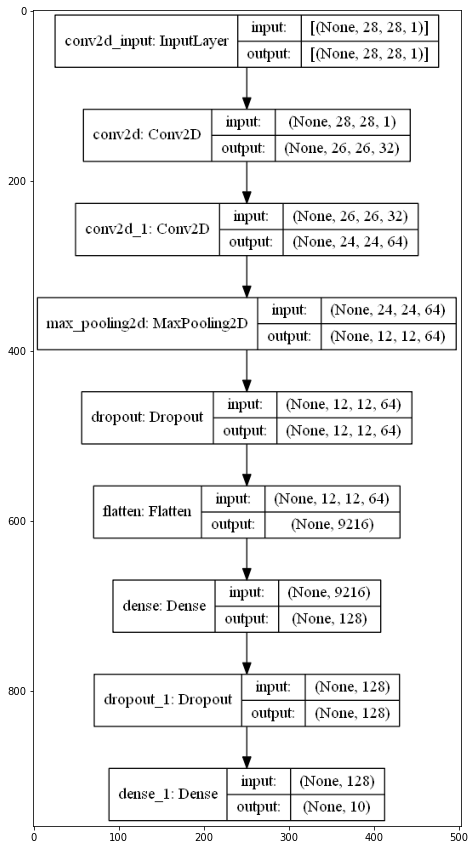

In [6]:
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
model_diagrams_path = "C:/Users/gabri/Curso_Visao_Computacional/Reconhecimento de digitos/Modelos Salvos/"

plot_model(model,to_file = model_diagrams_path+'model_plot.png',
          show_shapes = True,
          show_layer_names = True)

img = mpimg.imread(model_diagrams_path+'model_plot.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img)